In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:

#데이터셋 로딩
(x_train, y_train),(x_test, y_test)  = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
labels = ['T-shirt','Trouser','Pullover','Dress','Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#데이터 정규화
x_train = x_train/255.0
x_test = x_test/255.0

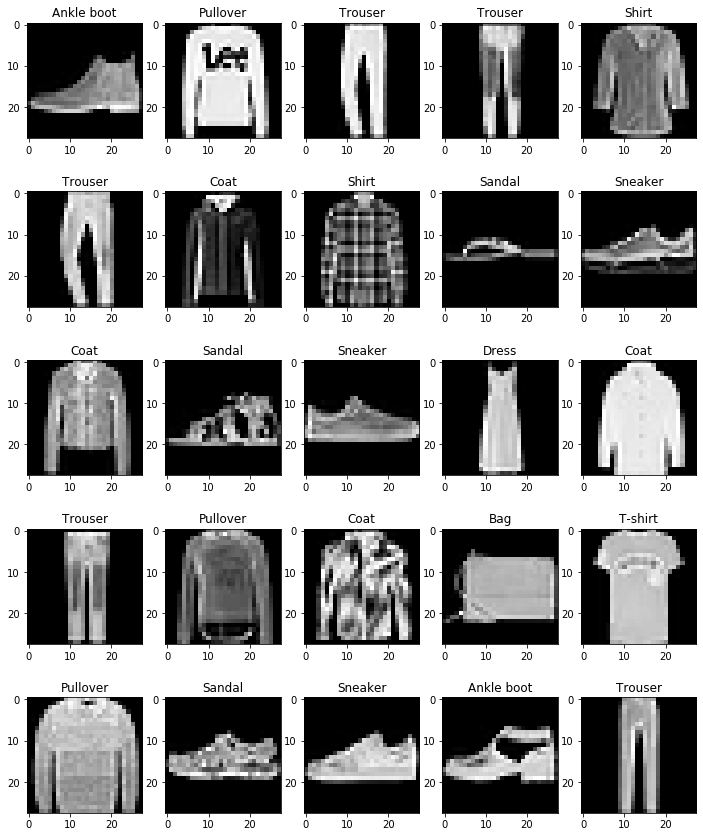

In [6]:
plt.figure(figsize=(12,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_test[i-1],'gray')
    plt.title(labels[y_test[i-1]])
plt.show()

In [63]:
#ANN 모델 만들기 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [64]:
#옵티마이저, 손실함수, 척도 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
# validation data설정후 모델학습
hist=model.fit(x_train[:10000], y_train[:10000], validation_split=0.2, epochs= 30)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 103us/sample - loss: 0.8079 - accuracy: 0.7171 - val_loss: 0.5738 - val_accuracy: 0.7995
Epoch 2/30
8000/8000 [==============================] - 1s 70us/sample - loss: 0.5463 - accuracy: 0.8090 - val_loss: 0.4922 - val_accuracy: 0.8270
Epoch 3/30
8000/8000 [==============================] - 1s 69us/sample - loss: 0.4811 - accuracy: 0.8324 - val_loss: 0.5166 - val_accuracy: 0.8135
Epoch 4/30
8000/8000 [==============================] - 1s 70us/sample - loss: 0.4398 - accuracy: 0.8468 - val_loss: 0.4549 - val_accuracy: 0.8280
Epoch 5/30
8000/8000 [==============================] - 1s 69us/sample - loss: 0.4076 - accuracy: 0.8535 - val_loss: 0.4349 - val_accuracy: 0.8395
Epoch 6/30
8000/8000 [==============================] - 1s 68us/sample - loss: 0.3914 - accuracy: 0.8596 - val_loss: 0.4170 - val_accuracy: 0.8455
Epoch 7/30
8000/8000 [==============================] - 1s 71us/sampl

In [68]:
#정확도 확인
print(hist.history['accuracy'])
print(hist.history['val_accuracy'])

[0.717125, 0.809, 0.832375, 0.84675, 0.8535, 0.859625, 0.871125, 0.873, 0.8815, 0.88275, 0.887, 0.89225, 0.893125, 0.901125, 0.9045, 0.907875, 0.912375, 0.914875, 0.912, 0.915375, 0.91825, 0.91875, 0.923, 0.924375, 0.927125, 0.9305, 0.928875, 0.9335, 0.937, 0.935375]
[0.7995, 0.827, 0.8135, 0.828, 0.8395, 0.8455, 0.8385, 0.8645, 0.8545, 0.8535, 0.851, 0.861, 0.8535, 0.8605, 0.8635, 0.865, 0.8595, 0.861, 0.8595, 0.862, 0.87, 0.8625, 0.8605, 0.86, 0.858, 0.8755, 0.869, 0.862, 0.8725, 0.8705]


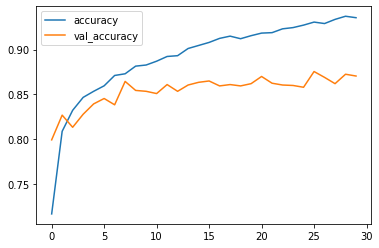

In [69]:
#정확도 그래프 그리기
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [70]:
model.evaluate(x_test,y_test,verbose=2)

10000/1 - 0s - loss: 0.3765 - accuracy: 0.8572


[0.4572492915391922, 0.8572]

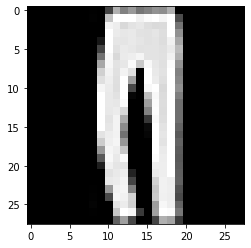

(1, 28, 28)
[[ 0 99  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


In [12]:
# 결과분석
test_num = 2
plt.imshow(x_test[test_num],'gray')
plt.show()

test_img = np.expand_dims(x_test[test_num], axis=0)
print(test_img.shape)
result = model.predict(test_img)
print((result*100).astype(int))
print(labels[np.argmax(result)])
print("y_test:",labels[y_test[test_num]])

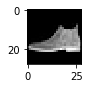

[[ 0  0  0  0  0  0  0  0  0 99]]
Ankle boot
y_test: Ankle boot


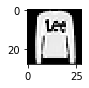

[[ 0  0 99  0  0  0  0  0  0  0]]
Pullover
y_test: Pullover


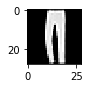

[[ 0 99  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


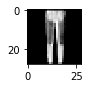

[[ 0 99  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


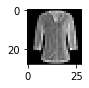

[[27  0  1  0  0  0 70  0  0  0]]
Shirt
y_test: Shirt


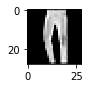

[[ 0 99  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


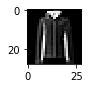

[[ 0  0  0  0 98  0  0  0  0  0]]
Coat
y_test: Coat


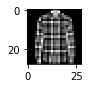

[[ 0  0  0  0  0  0 99  0  0  0]]
Shirt
y_test: Shirt


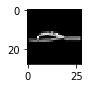

[[ 0  0  0  0  0 99  0  0  0  0]]
Sandal
y_test: Sandal


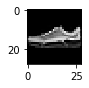

[[ 0  0  0  0  0  0  0 99  0  0]]
Sneaker
y_test: Sneaker


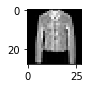

[[ 0  0 11  0 81  0  6  0  0  0]]
Coat
y_test: Coat


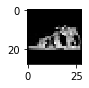

[[ 0  0  0  0  0 99  0  0  0  0]]
Sandal
y_test: Sandal


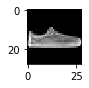

[[ 0  0  0  0  0 93  0  4  1  0]]
Sandal
y_test: Sneaker


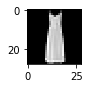

[[ 0  0  0 99  0  0  0  0  0  0]]
Dress
y_test: Dress


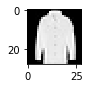

[[ 0  0 21  0 73  0  4  0  0  0]]
Coat
y_test: Coat


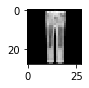

[[ 0 99  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


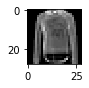

[[ 0  0 99  0  0  0  0  0  0  0]]
Pullover
y_test: Pullover


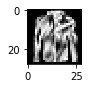

[[ 0  0 93  0  6  0  0  0  0  0]]
Pullover
y_test: Coat


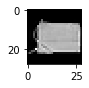

[[ 0  0  0  0  0  0  0  0 99  0]]
Bag
y_test: Bag


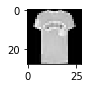

[[97  0  0  0  0  0  1  0  0  0]]
T-shirt
y_test: T-shirt


In [15]:
# 결과분석
for i in range(20):
    test_num = i
    plt.figure(figsize=(1,1))
    plt.imshow(x_test[test_num],'gray')
    plt.show()

    test_img = np.expand_dims(x_test[test_num], axis=0)
    result = model.predict(test_img)
    print((result*100).astype(int))
    print(labels[np.argmax(result)])
    print("y_test:",labels[y_test[test_num]])